# Clustering / Unsupervised Learning

##### Business Problem:
* Which countries need funding for development aid the most?

##### Data Question:

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#from sklearn.cluster import DBSCAN

In [19]:
colors = ['#FB9100','#55A599','#04647C']
#colors = ['#DB1C18','#DBDB3B','#51A2DB']

## Data Cleaning

In [4]:
data = pd.read_csv('Country-data.csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
data_dict = pd.read_csv('data-dictionary.csv')
pd.set_option("display.max_colwidth",180) #expands "description" for readability
data_dict

Column Name  \
0     country   
1  child_mort   
2     exports   
3      health   
4     imports   
5      Income   
6   Inflation   
7  life_expec   
8   total_fer   
9        gdpp   

                                                                                                        Description  
0                                                                                               Name of the country  
1                                                       Death of children under 5 years of age per 1000 live births  
2                                     Exports of goods and services per capita. Given as %age of the GDP per capita  
3                                                 Total health spending per capita. Given as %age of GDP per capita  
4                                     Imports of goods and services per capita. Given as %age of the GDP per capita  
5                                                                                             Net income per person  
6                                                        The measurement of the annual growth rate of the Total GDP  
7  The average number of years a new born child would live if the current mortality patterns are to remain the same  
8       The number of children that would be born to each woman if the current age-fertility rates remain the same.  
9                                  The GDP per capita. Calculated as the Total GDP divided by the total population.

##### Feature Description

* country: Name of the country
* child_mort: Death of children under 5 years of age per 1000 live births
* exports: Exports of goods and services per capita. Given as %age of the GDP per capita
* health: Total health spending per capita. Given as %age of GDP per capita
* imports: Imports of goods and services per capita. Given as %age of the GDP per capita
* Income: Net income per person
* Inflation: The measurement of the annual growth rate of the Total GDP
* life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
* total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same
* gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population

In [6]:
data.info()
#no text values, everything is float/integer except country name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data.shape 
#167 countries

(167, 10)

In [8]:
data.describe()
#data.describe().T

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [9]:
data['country'].value_counts()
#no multiple entries

Germany            1
Senegal            1
Vietnam            1
Ireland            1
Mali               1
                  ..
Chile              1
Lebanon            1
Solomon Islands    1
Chad               1
Yemen              1
Name: country, Length: 167, dtype: int64

In [10]:
data.isnull().sum()
#data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
format(len(data[data.duplicated()]))
#no duplicate values

'0'

In [12]:
#observations:

#small and neat dataset
#no null/na values
#no duplicates

## EDA

##### Univariate EDA

In [13]:
#test flatten
arr = np.array([[5,6], [7,8]])
arr

array([[5, 6],
       [7, 8]])

In [14]:
gfg = arr.flatten()
gfg

array([5, 6, 7, 8])

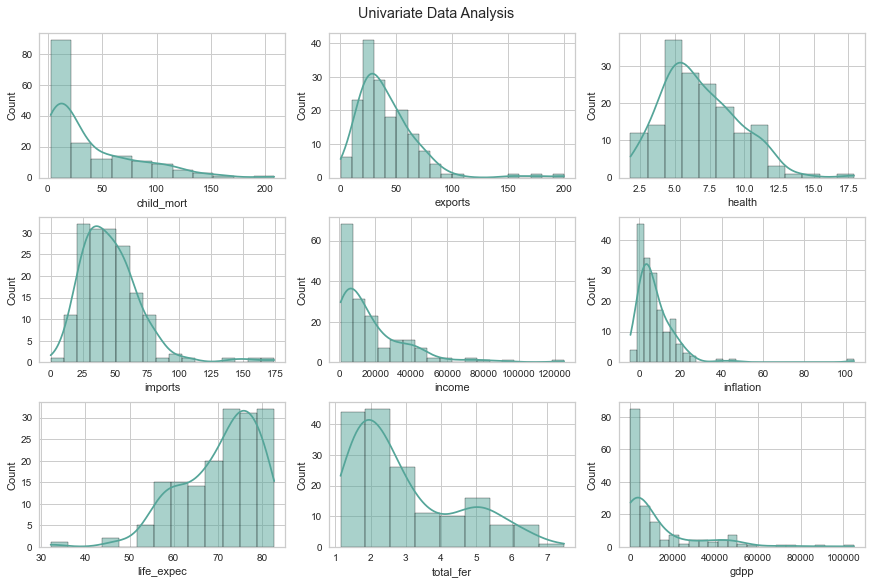

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,8), constrained_layout=True)
    #ax = array of axs (because grid of multiple subplots created)
plt.suptitle("Univariate Data Analysis") #title for whole figure
ax = ax.flatten() #flatten array of axs so can iterate through
int_cols = data.select_dtypes(exclude='object').columns #plot one graph for every column that doesn't contain "object" (ie country names)
for x, i in enumerate(int_cols): #adds counter to iterable 
    sns.histplot(data[i], #data = data in column position index i
                 ax=ax[x], #axis = column index x
                 kde=True, #kernel density estimate to add curve
                 color=colors[2]) 

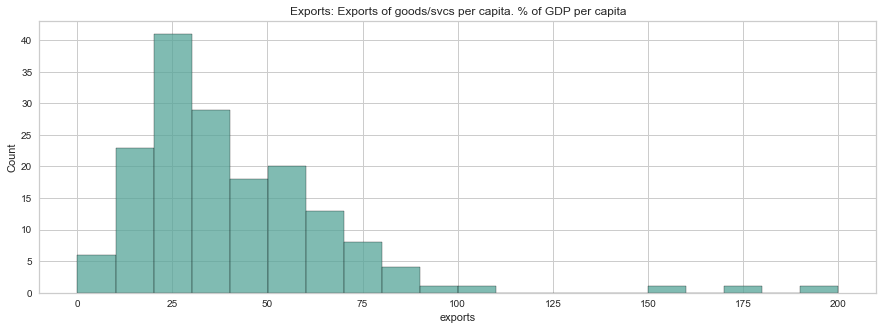

In [18]:
#zoom in, look at individual graphs:

plt.figure(figsize=(15,5))
plt.title("Exports: Exports of goods/svcs per capita. % of GDP per capita")
sns.set_style() #to default
ax = sns.histplot(data['exports'], color=colors[2])

C:\Users\Megan Yit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Megan Yit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Megan Yit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Megan Yit\

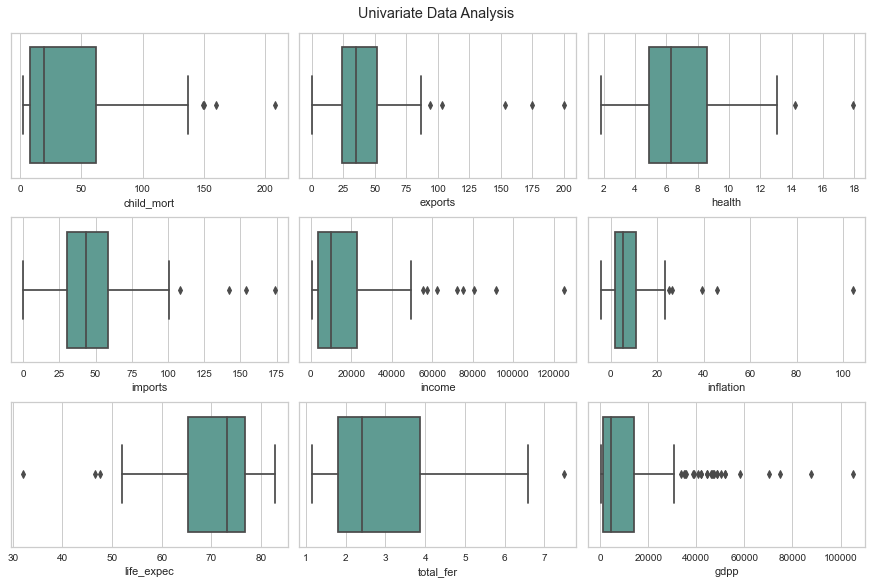

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,8), constrained_layout=True)
plt.suptitle("Univariate Data Analysis")
ax = ax.flatten()
int_cols = data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data[i], ax=ax[x], color=colors[2])

In [18]:
#observations

#both boxplot and histplot shows numerical features are continuous & discrete (no categorical)
#boxplot shows outliers in everything (but shouldn't be removed because it's international comparison)
#Consider: Manhaten distance clustering algo - less sensitive to outliers?

In [20]:
#for better visualisation by location

#from above,
#int_cols = data.select_dtypes(exclude='object').columns #all columns except country name

for i in int_cols: #for every column (ie feature)
    fig=px.choropleth(data_frame=data,
                     locationmode='country names', #'ISO-3', 'USA-states', 'country names': determines the locations used to match entries in 'locations' to map
                     locations='country', #str/int/series/array-like
                     color=i, #str/int/series/array-like, values here used to assign color to marks
                     title=f'{i} rate by countries')
    fig.show()

In [20]:
#observations:

#with naked eye, appears to be 2 big clusters:
    #1 - African + South Asian countries
    #2 - ROW countries

##### Bivariate EDA

In [21]:
#exports vs imports
px.scatter(data_frame=data, 
          x='exports',
          y='imports',
          size='gdpp', 
          text='country',
          color='gdpp',
          title='Countries by Export & Import, w corresponding GDP ')

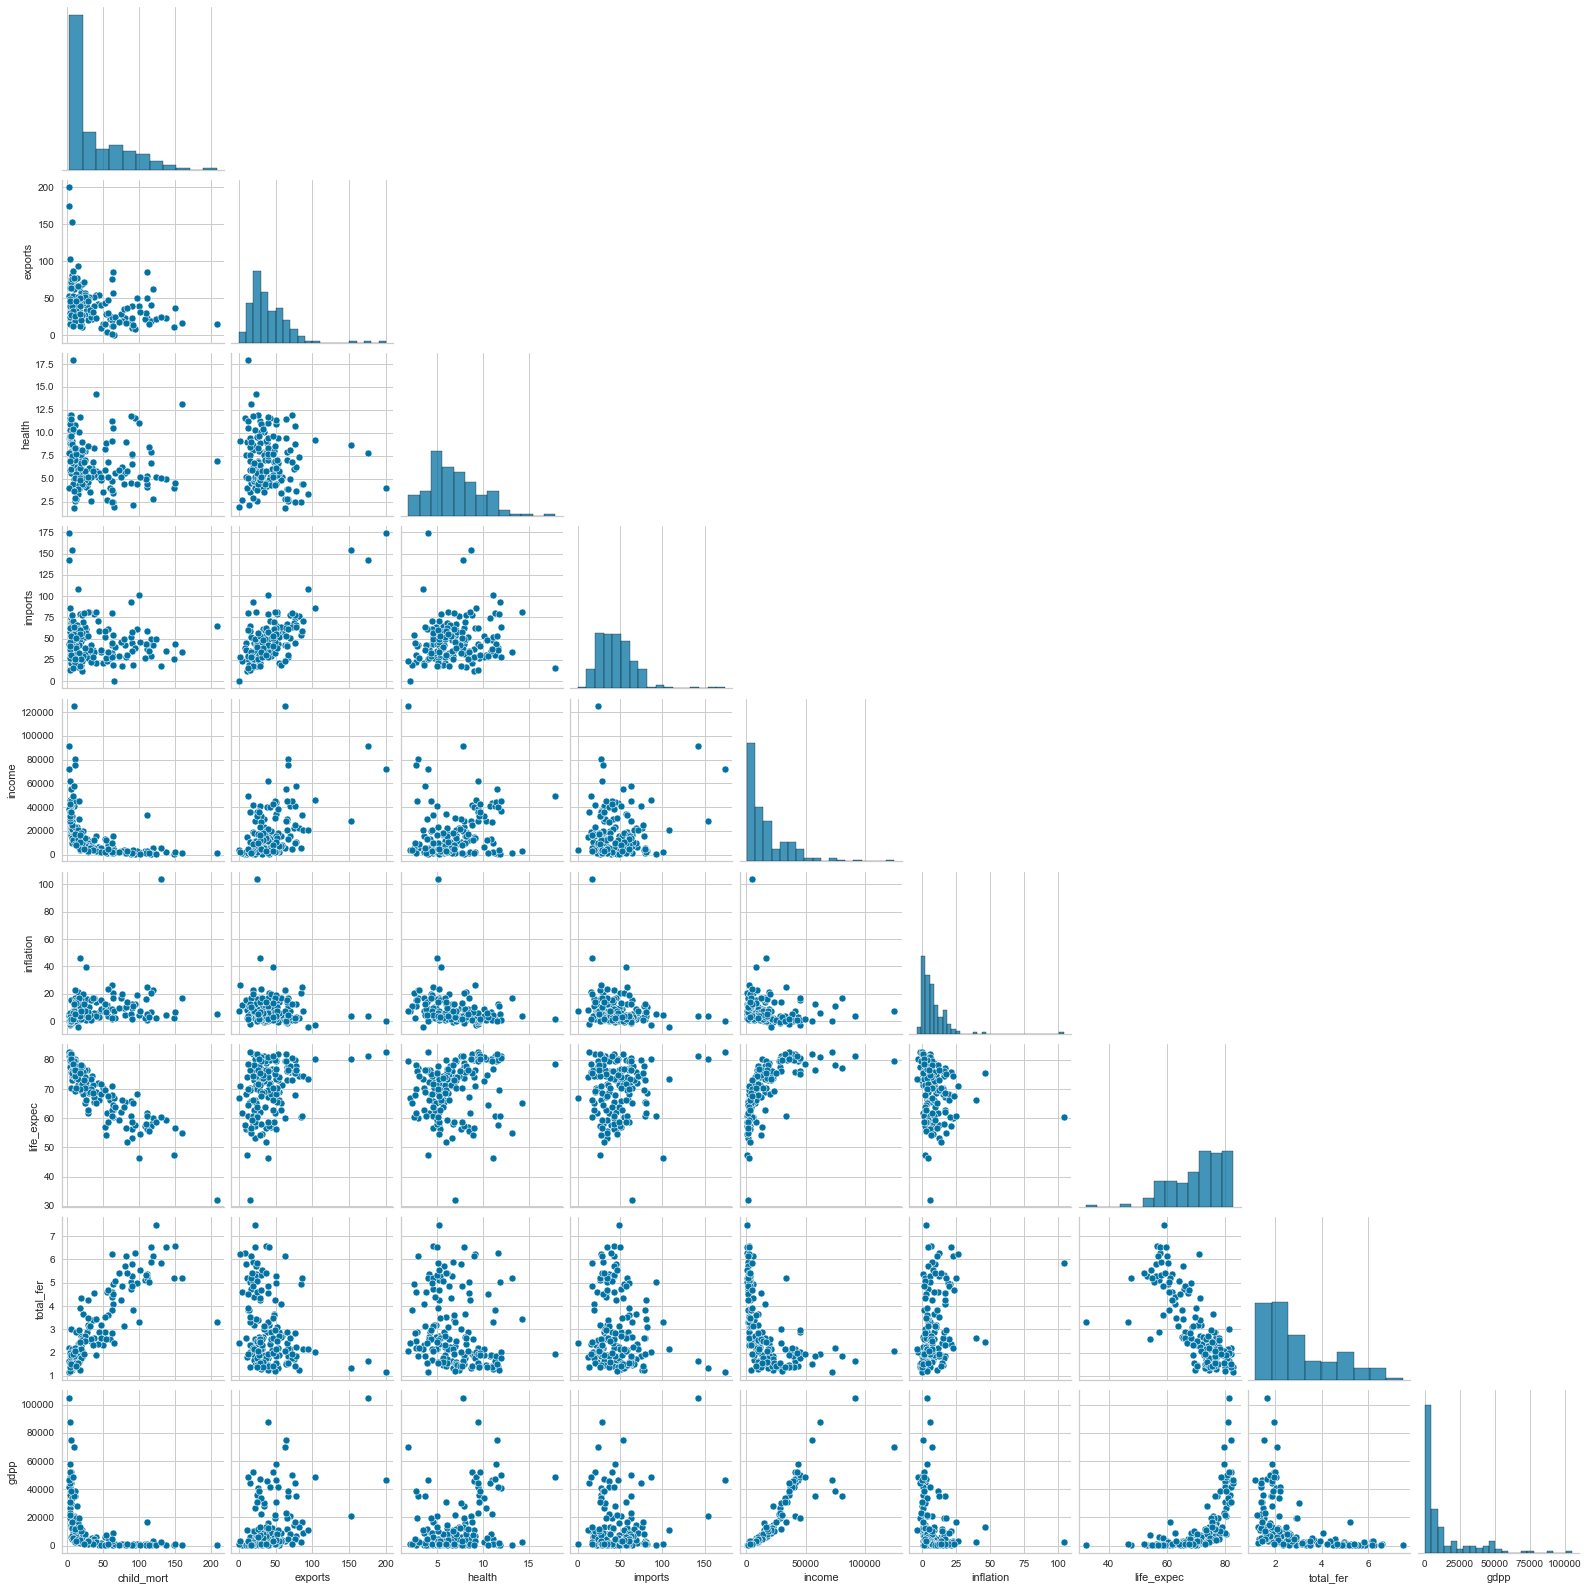

In [22]:
#are there feature that show strong rs / corr with each other (can consider removing for simplicity)
#look at rs

sns.pairplot(data, corner=True) # only need to see half the plots (symmetrical)

In [23]:
#observations:

#child mortality and GDPP has negative rs
#export, income, life exp have positive rs with GDPP
#total_fert and child mortality have positive rs
#life exp and child mortality have negative rs

<AxesSubplot:>

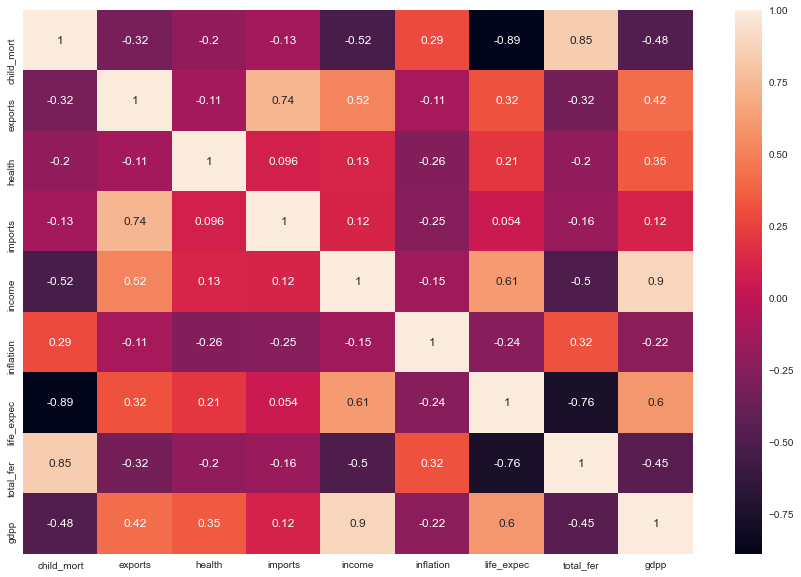

In [24]:
#look at correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

<AxesSubplot:>

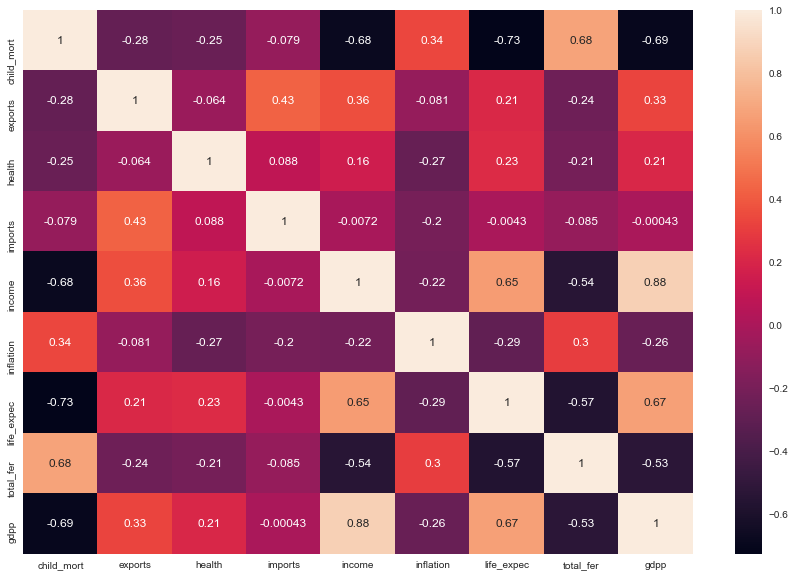

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='kendall'), annot=True)

<AxesSubplot:>

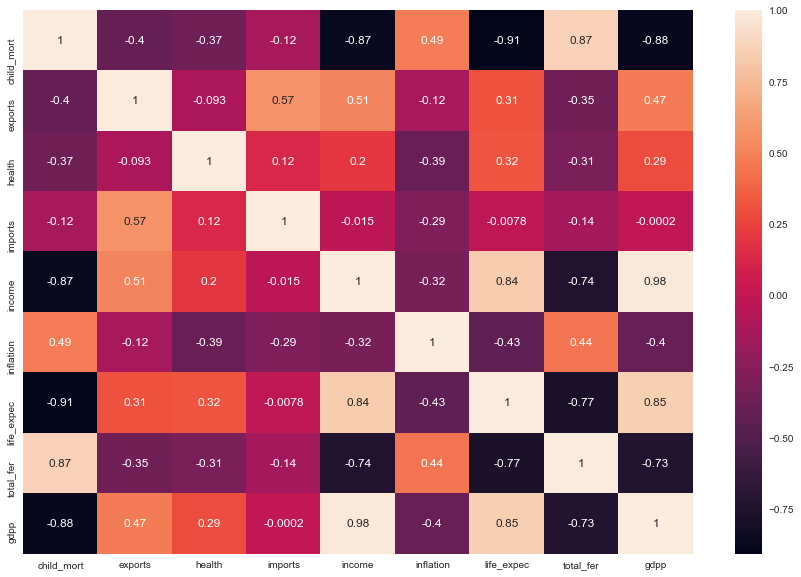

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='spearman'), annot=True)

In [27]:
#observations for 3 diff heatmaps with 3 different methods:

#there is high correlation between some features
    #life exp and child mortality
    #total fertility and child mortality
    #income and gdpp
    
#can consider removing to simplify model

<img src="image0.JPG">

## Scale Data (normalisation, standardisation)

* Why? because data is in different units (eg %, $) and range is different, so remove bias caused by features w larger magnitudes in values
* Normalization typically means rescales the values into a range of [0,1]
* Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

In [28]:
feats = data.drop(['country'], axis=1) #axis=1 is column axis, axis=0 is row axis
feats.head() #contains features to be scaled

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

#### 1: Normalise (MinMaxScaler)

In [29]:
columns = feats.columns

In [30]:
scaler1 = MinMaxScaler() #scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset
norm_feats = scaler1.fit_transform(feats)
norm_feats

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [31]:
#create df for normalised features
feats_norm = pd.DataFrame(data=norm_feats,
                               columns=columns)
feats_norm

child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp  
0      0.475345   0.736593  0.003073  
1      0.871795   0.078864  0.036833  
2      0.875740   0.274448  0.040365  
3      0.552268   0.790221  0.031488  
4      0.881657   0.154574  0.114242  
..          ...        ...       ...  
162    0.609467   0.370662  0.026143  
163    0.854043   0.208202  0.126650  
164    0.808679   0.126183  0.010299  
165    0.698225   0.555205  0.010299  
166    0.392505   0.670347  0.011731  

[167 rows x 9 columns]

#### 2: Standardise (StandardScaler)

In [32]:
scaler2 = StandardScaler() #makes mean = 0 and scales the data to unit variance
standard_feats = scaler2.fit_transform(feats)
standard_feats

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [33]:
#create df for standardised features
feats_standard = pd.DataFrame(data=standard_feats,
                               columns=columns)
feats_standard

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

Text(0, 0.5, 'Child Mortality')

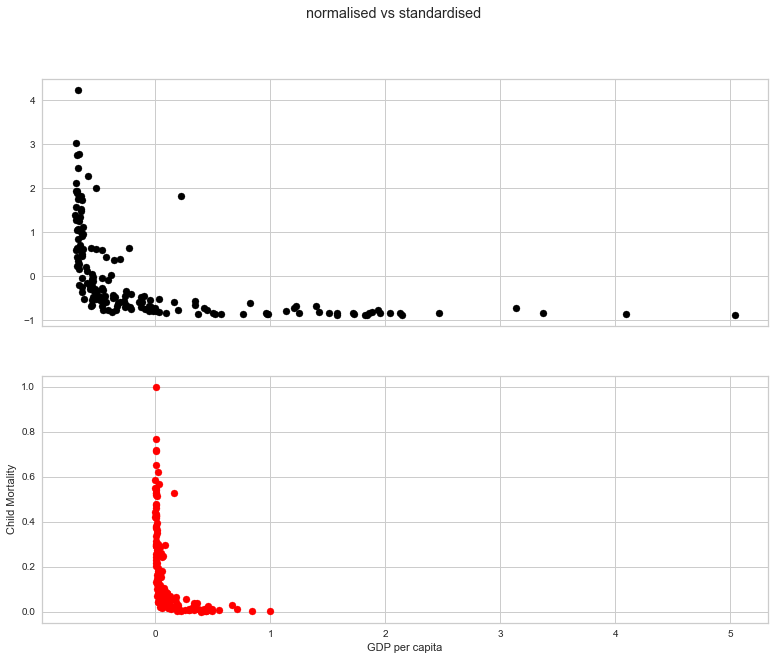

In [34]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(13,10), sharex=True)
fig.suptitle('normalised vs standardised')

ax1.scatter(feats_standard['gdpp'],
           feats_standard['child_mort'],
           color='black')
#ax1.grid()
ax2.scatter(feats_norm['gdpp'],
           feats_norm['child_mort'],
           color='red')
#ax2.grid()
plt.xlabel('GDP per capita')
plt.ylabel('Child Mortality')



#only scale different

## PCA with scaled data

Dr Jawad's note: don't need to do PCA on this data actually because it's already small

#### 3: PCA + Standardised features

In [35]:
pca = PCA()

pca.fit(feats_standard) #calculates parameters mean and s.d., saves as internal objects
pca_feats_standard = pca.transform(feats_standard) #uses calculated parameters, transforms dataset
    #applies dimensionality reduction to dataset
    #eg: dataset is n_samples*n_features, output dataset will be n_samples*n_components 

In [36]:
#percentage variance
percentage_var = np.round(pca.explained_variance_ratio_*100, decimals=1) #shape of array (n_components, _)
labels = ['PC' + str(x) for x in range(1, len(percentage_var)+1)]

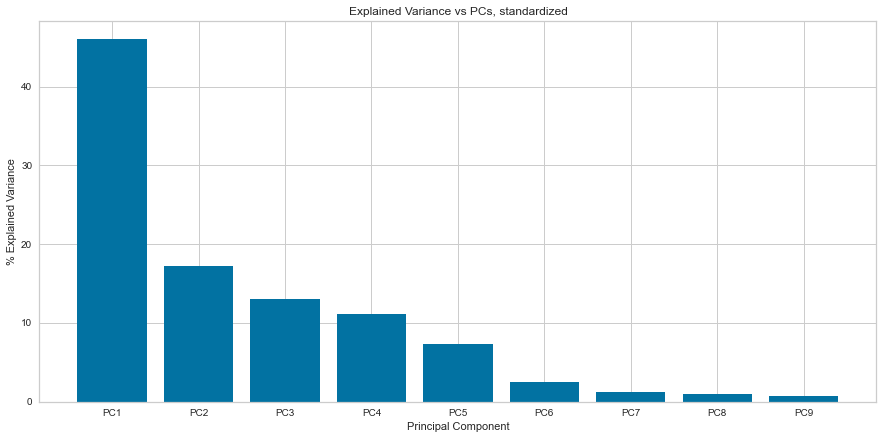

In [37]:
#plot percentage variance (explained) by principal component
plt.figure(figsize=(15,7))
plt.bar(x=range(1, len(percentage_var)+1),
        height=percentage_var,
        tick_label=labels)
#plt.grid()
plt.ylabel('% Explained Variance')
plt.xlabel('Principal Component')
plt.title('Explained Variance vs PCs, standardized')
plt.show()

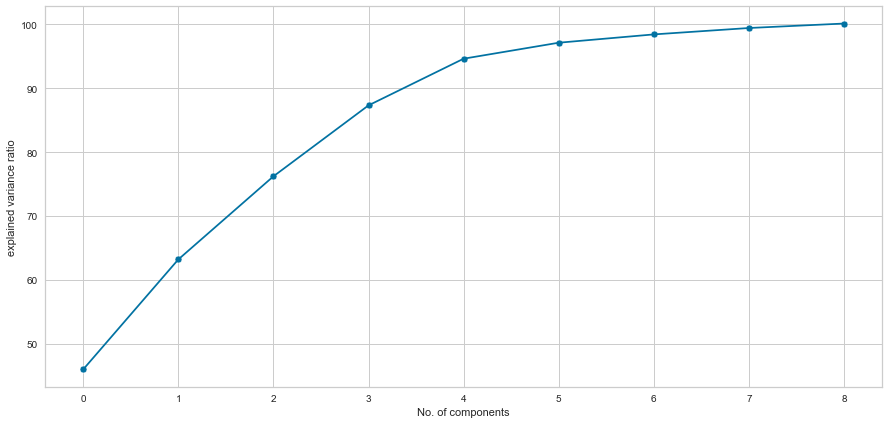

In [38]:
cum_exp_ratio = np.cumsum(np.round(pca.explained_variance_ratio_*100, decimals=1))
fig=plt.figure(figsize=(15,7))
ax=sns.lineplot(y=cum_exp_ratio,
               x=np.arange(0, len(cum_exp_ratio)))
ax=sns.scatterplot(y=cum_exp_ratio,
                  x=np.arange(0, len(cum_exp_ratio)))
ax.set_xlabel('No. of components')
ax.set_ylabel('explained variance ratio')
plt.show()

In [39]:
pca_feats_standard = pd.DataFrame(pca_feats_standard, 
                                 columns=labels)

#### 4: PCA + Normalised features

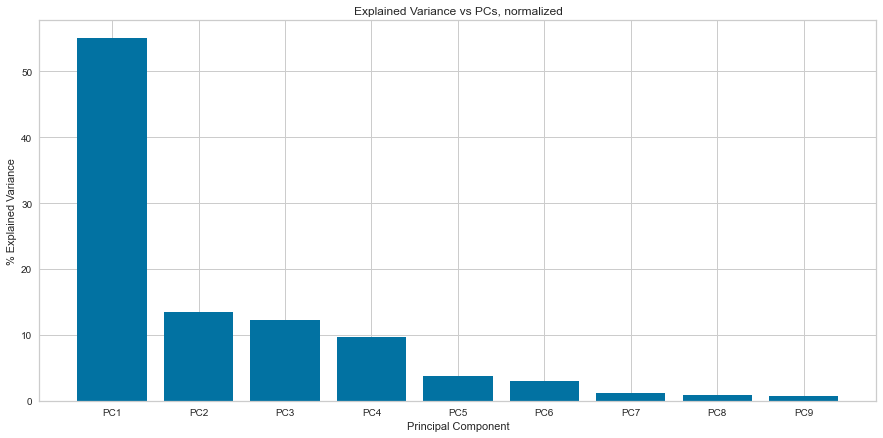

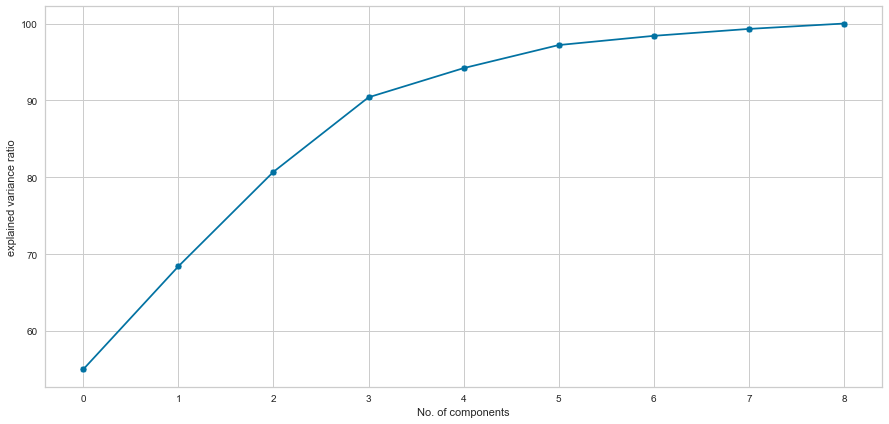

In [40]:
pca = PCA()
pca.fit(feats_norm)
pca_feats_norm = pca.transform(feats_norm)

#percentage variance
percentage_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(percentage_var)+1)]

#plot percentage variance (explained) by principal component
plt.figure(figsize=(15,7))
plt.bar(x=range(1, len(percentage_var)+1),
        height=percentage_var,
        tick_label=labels)
#plt.grid()
plt.ylabel('% Explained Variance')
plt.xlabel('Principal Component')
plt.title('Explained Variance vs PCs, normalized')
plt.show()


############################


cum_exp_ratio = np.cumsum(np.round(pca.explained_variance_ratio_*100, decimals=1))
fig=plt.figure(figsize=(15,7))
ax=sns.lineplot(y=cum_exp_ratio,
               x=np.arange(0, len(cum_exp_ratio)))
ax=sns.scatterplot(y=cum_exp_ratio,
                  x=np.arange(0, len(cum_exp_ratio)))
ax.set_xlabel('No. of components')
ax.set_ylabel('explained variance ratio')
plt.show()


############################


pca_feats_norm = pd.DataFrame(pca_feats_norm, 
                                 columns=labels)

In [41]:
#observations:

#from PCA with both standardised and normalised data, ~3 to 4 PCs can explain ~90% of variance (distribution of original data)

In [42]:
PCA_feats_standard = pca_feats_standard.drop(['PC5', 'PC6', 'PC7', 'PC8', 'PC9'], axis=1)
PCA_feats_standard

PC1       PC2       PC3       PC4
0   -2.913025  0.095621 -0.718118  1.005255
1    0.429911 -0.588156 -0.333486 -1.161059
2   -0.285225 -0.455174  1.221505 -0.868115
3   -2.932423  1.695555  1.525044  0.839625
4    1.033576  0.136659 -0.225721 -0.847063
..        ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595
163 -0.551036 -1.233886  3.101350 -0.115311
164  0.498524  1.390744 -0.238526 -1.074098
165 -1.887451 -0.109453  1.109752  0.056257
166 -2.864064  0.485998  0.223167  0.816364

[167 rows x 4 columns]

In [43]:
PCA_feats_norm = pca_feats_norm.drop(['PC5', 'PC6', 'PC7', 'PC8', 'PC9'], axis=1)
PCA_feats_norm

PC1       PC2       PC3       PC4
0   -0.599078  0.095490  0.157554 -0.024333
1    0.158474 -0.212092 -0.064189 -0.061247
2    0.003686 -0.135867 -0.134182  0.133574
3   -0.650235  0.275975 -0.142672  0.156018
4    0.200711 -0.064662 -0.100715 -0.037902
..        ...       ...       ...       ...
162 -0.160078 -0.029625 -0.121910 -0.066099
163  0.061133 -0.171339 -0.058586  0.247460
164  0.115512 -0.032034 -0.195243 -0.231993
165 -0.332968 -0.019824 -0.029989  0.105416
166 -0.573897  0.108788  0.032552  0.044839

[167 rows x 4 columns]

#### consider t-SNE instead of PCA since data is high-dimensional
(PCA is linear dimension reduction technique, tries to maximise variance and preserve large pairwise distances ie things that are different end up far apart > might result in poor visualization esp if data structure is non-linear and manifold eg ball, curve

vs t-SNE which preserves only small pairwise distances that PCA may incorrectly preserve for nonlinear manifold dataset structures)

read: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

<img src="image1.JPG">

## K-Means Clustering

In [44]:
kmeans = KMeans(n_clusters = 3,
               init = 'random',
               n_init = 10,
               max_iter = 300,
               random_state = 0)

In [45]:
#run model with feats_norm (normalised features)
y_preds_norm = kmeans.fit_predict(feats_norm)
y_preds_norm

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [46]:
#run model with feats_standard (standardised features)
y_preds_standard = kmeans.fit_predict(feats_standard)
y_preds_standard

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [47]:
#run model with PCA_feats_standard (standardised, 4 PCs)
y_preds_PCA_standard = kmeans.fit_predict(PCA_feats_standard)
y_preds_PCA_standard

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [48]:
#run model with PCA_feats_norm (normalised, 4 PCs)
y_preds_PCA_norm = kmeans.fit_predict(PCA_feats_norm)
y_preds_PCA_norm

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

### Find optimal no. of clusters (Elbow)

(empirical method to find optimal no. of clusters; pick candidates for n_clusters value then apply K-Means clustering to each of the values, find avg distance of each point in a cluster to its centroid and plot. Pick n_clusters value where avg distance falls drastically)

C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'SSE against No. of clusters (normalised)')

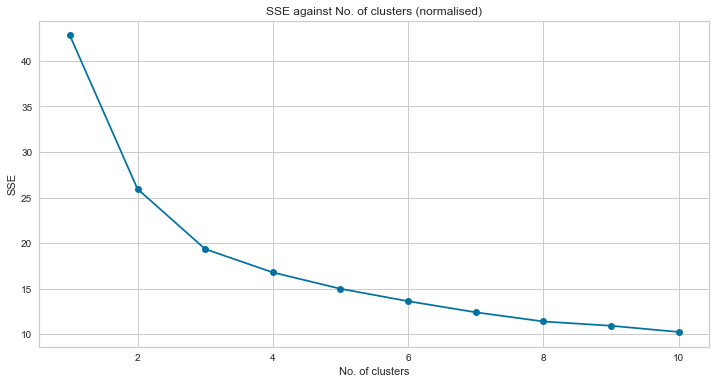

In [49]:
#vary the no. of clusters
#find optimal number of clusters
#elbow method

sse1 = [] #initialize empty sum of squared errors list

for i in range(1, 11): #1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                  # init='random',
                   n_init=10,
                   max_iter=300,
                   random_state=0)
    
    #for normalised features
    kmeans.fit(feats_norm)
    sse1.append(kmeans.inertia_)
        #inertia: sum of squared distances of samples to their closest cluster center.
    
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), sse1, marker='o')
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.title('SSE against No. of clusters (normalised)')

C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'SSE against No. of clusters (standardised)')

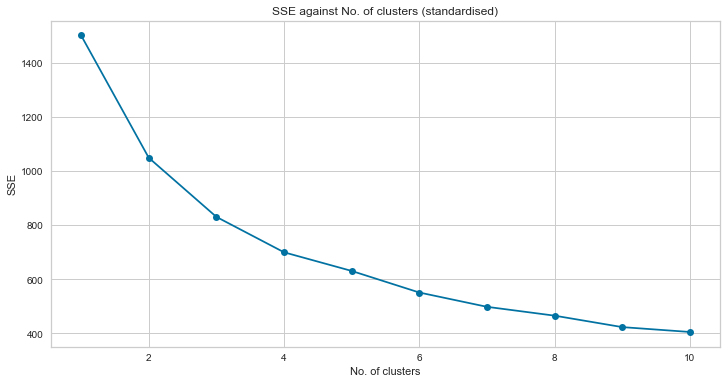

In [50]:
sse2 = [] #initialize empty sum of squared errors list

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                  # init='random',
                   n_init=10,
                   max_iter=300,
                   random_state=0)
    
    #for standardised features
    kmeans.fit(feats_standard)
    sse2.append(kmeans.inertia_)
        #inertia: sum of squared distances of samples to their closest cluster center.
    
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), sse2, marker='o')
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.title('SSE against No. of clusters (standardised)')

C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'SSE against No. of clusters (normalised with PCA)')

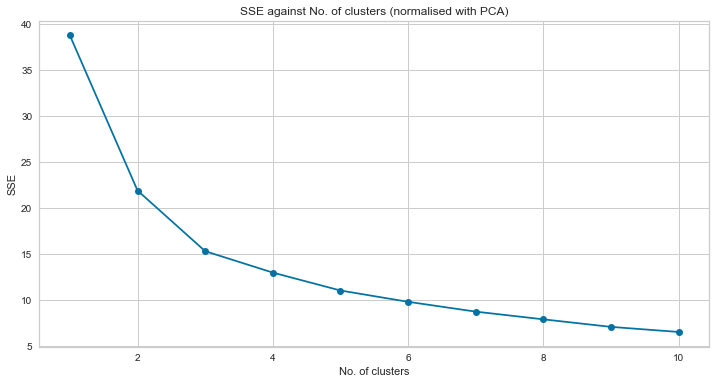

In [51]:
sse3 = [] #initialize empty sum of squared errors list

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                  # init='random',
                   n_init=10,
                   max_iter=300,
                   random_state=0)
    
    #for normalised features, PCA applied
    kmeans.fit(PCA_feats_norm)
    sse3.append(kmeans.inertia_)
        #inertia: sum of squared distances of samples to their closest cluster center.
    
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), sse3, marker='o')
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.title('SSE against No. of clusters (normalised with PCA)')

C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'SSE against No. of clusters (standardised with PCA)')

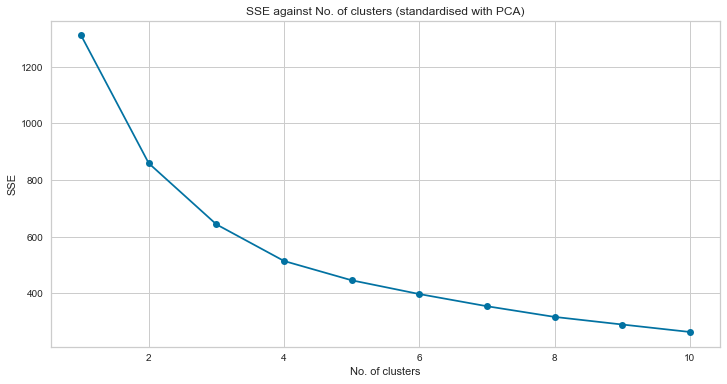

In [52]:
sse4 = [] #initialize empty sum of squared errors list

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                  # init='random',
                   n_init=10,
                   max_iter=500,
                   random_state=0)
    
    #for standardised features, PCA applied
    kmeans.fit(PCA_feats_standard)
    sse4.append(kmeans.inertia_)
        #inertia: sum of squared distances of samples to their closest cluster center.
    
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), sse4, marker='o')
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.title('SSE against No. of clusters (standardised with PCA)')

In [53]:
#comparing the K-Means model for 4 versions of dataset
#optimal no. of clusters (elbow method) = 2-3

### Find optimal no. of clusters (Silhouette)
* value between -1 and 1
* best = 1
* closer to 0 = overlapping clusters
* -ve values = (generally) sample assigned to wrong cluster since another cluster is more similar
* visualizer = red: avg silhouette score

(good for data with higher dimensions, method computes silhouette coeff of each point - measures how similar a point is to its own cluster, cohesion, vs others, separation - avg out the coeffs to get silhouette score)
<br>
(silhouette plot displays measure of how close each point in one cluster is to points in neighbouring clusters ie look at horizontal axis, the higher the x-value, the further that cluster (silhouette) is from other clusters)

##### standardised features, no PCA

In [54]:
#find optimal no. of clusters using Silhoutte method

#set n_clusters = 2 first
kmeans = KMeans(n_clusters=2,
               random_state=0)
kmeans.fit(feats_standard)

#standardised features, no PCA
score = silhouette_score(feats_standard,
                         labels=kmeans.labels_, #pred labels for each sample = ndarray of shape (n_samples,)
                         metric='euclidean')
print('Silhouette Score with n_clusters 2: %.3f' % score) #3 d.p.

###########################

#set n_clusters = 3 
kmeans = KMeans(n_clusters=3,
               random_state=0)
kmeans.fit(feats_standard)

#standardised features, no PCA
score = silhouette_score(feats_standard,
                         labels=kmeans.labels_, #pred labels for each sample = ndarray of shape (n_samples,)
                         metric='euclidean')
print('Silhouette Score with n_clusters 3: %.3f' % score) #3 d.p.

Silhouette Score with n_clusters 2: 0.287
Silhouette Score with n_clusters 3: 0.283


[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


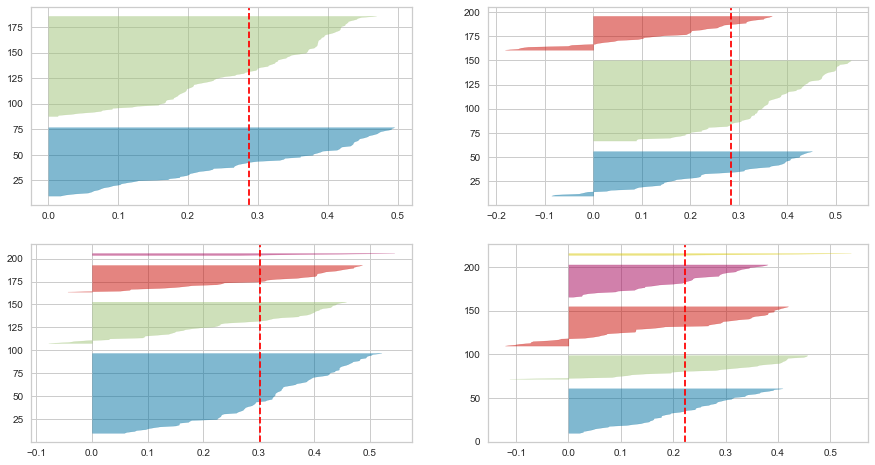

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
print(ax)


for i in [2,3,4,5]: #test n_clusters 2-5 (vs range of 1-10 as for elbow)
    
    #estimator
    kmeans = KMeans(n_clusters=i,
                  # init='random',
                   n_init=10,
                   max_iter=300,
                   random_state=0)
    
    quo, rem = divmod(i, 2) #for assigning plots to the subplots below
        #takes two numbers as parameters
        #gives the quotient and remainder of their division as a tuple
        
    visualizer = SilhouetteVisualizer(kmeans, #unfitted estimator
                                     colors='yellowbrick',
                                     ax = ax[quo-1][rem])
                                        #axes for plotting figures on
                                        #need ax arg so that plots appear on diff graphs
                                        #eg: for i=3, ax = ax[1][1] will be row 1, col 1, ie top right graph
    
    visualizer.fit(feats_standard) #fits model and embedded estimator + generates visualization

##### normalised features, no PCA

In [56]:
#normalised features, no PCA

#set n_clusters = 2 first
kmeans = KMeans(n_clusters=2,
               random_state=0)
kmeans.fit(feats_norm)

score = silhouette_score(feats_norm,
                         kmeans.labels_, #pred labels for each sample = ndarray of shape (n_samples,)
                         metric='euclidean')
print('Silhouette Score with n_clusters 2: %.3f' % score) #3 d.p.

##########################

#set n_clusters = 3 
kmeans = KMeans(n_clusters=3,
               random_state=0)
kmeans.fit(feats_norm)

score = silhouette_score(feats_norm,
                         kmeans.labels_, #pred labels for each sample = ndarray of shape (n_samples,)
                         metric='euclidean')
print('Silhouette Score with n_clusters 3: %.3f' % score) #3 d.p.

Silhouette Score with n_clusters 2: 0.384
Silhouette Score with n_clusters 3: 0.339


[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


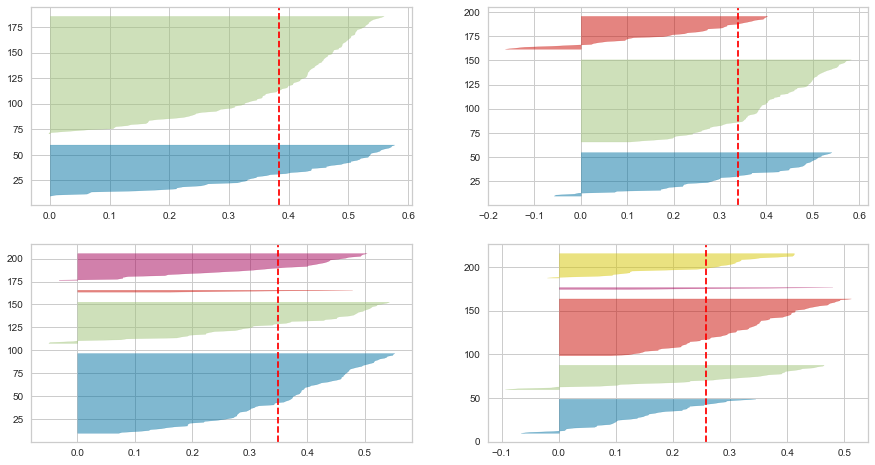

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
print(ax)


for i in [2,3,4,5]: #test n_clusters 2-5 (vs range of 1-10 as for elbow)
    
    #estimator
    kmeans = KMeans(n_clusters=i,
                  # init='random',
                   n_init=10,
                   max_iter=300,
                   random_state=0)
    quo, rem = divmod(i, 2) #for assigning plots to the subplots below
        #takes two numbers as parameters
        #gives the quotient and remainder of their division as a tuple
        
    visualizer = SilhouetteVisualizer(kmeans, #estimator
                                     colors='yellowbrick',
                                     ax = ax[quo-1][rem])
                                        #axes for plotting figures on
                                        #need ax arg so that plots appear on diff graphs
                                        #eg: for i=3, ax = ax[1][1] will be row 1, col 1, ie top right graph
    
    visualizer.fit(feats_norm) 

##### normalised features, with PCA and dimensionality reduction

Silhouette Score with n_clusters 2: 0.411
Silhouette Score with n_clusters 3: 0.388
[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


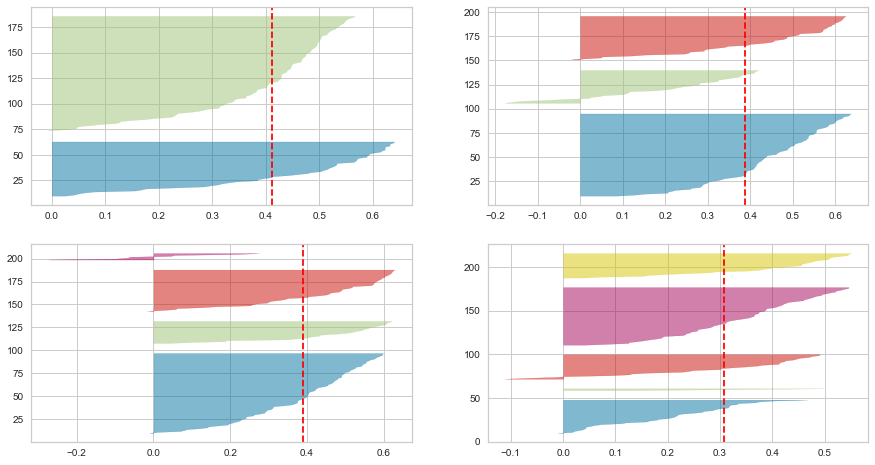

In [58]:
kmeans = KMeans(n_clusters=2,
               random_state=0)
kmeans.fit(PCA_feats_norm)

score = silhouette_score(PCA_feats_norm,
                         kmeans.labels_,
                             #pred labels for each sample = ndarray of shape (n_samples,)
                         metric='euclidean')
print('Silhouette Score with n_clusters 2: %.3f' % score) #3 d.p.

###########

kmeans = KMeans(n_clusters=3,
               random_state=0)
kmeans.fit(PCA_feats_norm)

score = silhouette_score(PCA_feats_norm,
                         kmeans.labels_,
                             #pred labels for each sample = ndarray of shape (n_samples,)
                         metric='euclidean')
print('Silhouette Score with n_clusters 3: %.3f' % score) #3 d.p.

###########

fig, ax = plt.subplots(2, 2, figsize=(15,8))
print(ax)


for i in [2,3,4,5]:
#test n_clusters 2,3,4,5 (vs range of 1-10 as for elbow)
    
    #estimator
    kmeans = KMeans(n_clusters=i,
                  # init='random',
                   n_init=10,
                   max_iter=300,
                   random_state=0)
    quo, rem = divmod(i, 2)
        #for assigning plots to the subplots below
        #takes two numbers as parameters
        #gives the quotient and remainder of their division as a tuple
        
    visualizer = SilhouetteVisualizer(kmeans, #estimator
                                     colors='yellowbrick',
                                     ax = ax[quo-1][rem])
                                        #axes for plotting figures on
                                        #need ax arg so that plots appear on diff graphs
                                        #eg: for i=3, ax = ax[1][1] will be row 1, col 1, ie top right graph
    
    visualizer.fit(PCA_feats_norm)
    #fits model, generates visualization

##### standardized features, with PCA and dimensionality reduction

Silhouette Score with n_clusters 2: 0.322
Silhouette Score with n_clusters 3: 0.334
[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


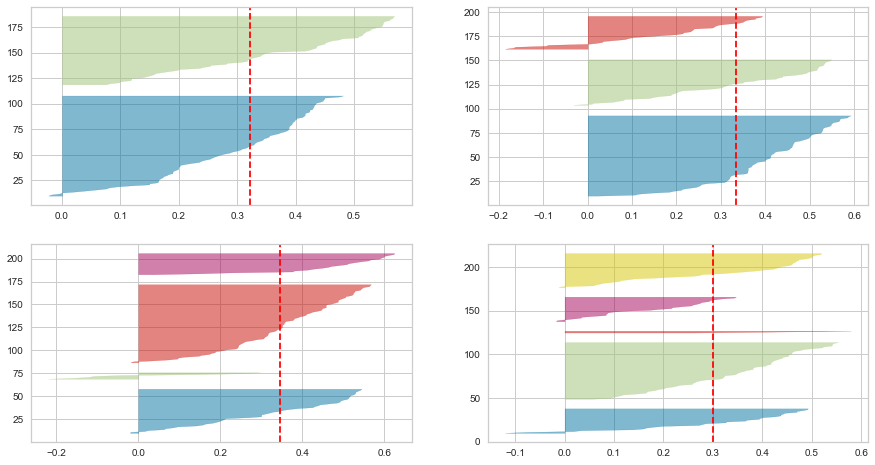

In [59]:
kmeans = KMeans(n_clusters=2,
               random_state=0)
kmeans.fit(PCA_feats_standard)

score = silhouette_score(PCA_feats_standard,
                         kmeans.labels_,
                             #pred labels for each sample = ndarray of shape (n_samples,)
                         metric='euclidean')
print('Silhouette Score with n_clusters 2: %.3f' % score) #3 d.p.

###############

kmeans = KMeans(n_clusters=3,
               random_state=0)
kmeans.fit(PCA_feats_standard)

score = silhouette_score(PCA_feats_standard,
                         kmeans.labels_,
                             #pred labels for each sample = ndarray of shape (n_samples,)
                         metric='euclidean')
print('Silhouette Score with n_clusters 3: %.3f' % score) #3 d.p.

###############

fig, ax = plt.subplots(2, 2, figsize=(15,8))
print(ax)


for i in [2,3,4,5]:
#test n_clusters 2,3,4,5 (vs range of 1-10 as for elbow)
    
    #estimator
    kmeans = KMeans(n_clusters=i,
                   init='random',
                   n_init=10,
                   max_iter=300,
                   random_state=0)
    quo, rem = divmod(i, 2)
        #for assigning plots to the subplots below
        #takes two numbers as parameters
        #gives the quotient and remainder of their division as a tuple
        
    visualizer = SilhouetteVisualizer(kmeans, #estimator
                                     colors='yellowbrick',
                                     ax = ax[quo-1][rem])
                                        #axes for plotting figures on
                                        #need ax arg so that plots appear on diff graphs
                                        #eg: for i=3, ax = ax[1][1] will be row 1, col 1, ie top right graph
    
    visualizer.fit(PCA_feats_standard)
    #fits model, generates visualization

In [60]:
#observations

#normalized + PCA + dimensionality reduction = best silhouette score for n_clusters = 3
#generally n_clusters 2 show better scores than n_clusters 3 (ceteris paribus)
#scores all generally close to zero (clusters are overlapping)
#optimal clusters either 2/3 (n_clusters=3 sees misclassification in one cluster)
#when n_clusters increases to 4/5, negative values appear for most clusters (samples assigned to wrong clusters)

## other Internal Validation Indices (besides Silhouette)
Compare results (with respect to cohesion and separation of clusters predicted)

In [91]:
n_clusters = [2, 3]
datasets = [feats_norm, feats_standard, PCA_feats_norm, PCA_feats_standard]
datasets_names = ['feats_norm', 'feats_standard', 'PCA_feats_norm', 'PCA_feats_standard']

### Calinski and Harabasz score
* also "variance ratio criterion"
* ratio between within-cluster dispersion vs between-cluster dispersion
* ie higher score = better defined clusters (denser, better separated)
* drawbacks: higher for convex clusters 

In [93]:
for i, k in zip(datasets, datasets_names):
    for j in n_clusters:
        
        #fit model
        model = KMeans(n_clusters = j,
                      random_state=0)
        preds = model.fit_predict(i)
        
        #calculate score
        ch_score = calinski_harabasz_score(X = i, #array-like, shape(n_samples, n_features)
                                          labels = preds) #array-like, shape(n_samples, )
        print(f'Calinski and Harabasz score with dataset "{k}" and n_clusters {j} = {ch_score}')

Calinski and Harabasz score with dataset "feats_norm" and n_clusters 2 = 107.20984967326454
Calinski and Harabasz score with dataset "feats_norm" and n_clusters 3 = 99.41501294064736
Calinski and Harabasz score with dataset "feats_standard" and n_clusters 2 = 71.13746166773552
Calinski and Harabasz score with dataset "feats_standard" and n_clusters 3 = 66.23475806200629
Calinski and Harabasz score with dataset "PCA_feats_norm" and n_clusters 2 = 127.17697799782385
Calinski and Harabasz score with dataset "PCA_feats_norm" and n_clusters 3 = 125.84211494014465
Calinski and Harabasz score with dataset "PCA_feats_standard" and n_clusters 2 = 86.68907500800768
Calinski and Harabasz score with dataset "PCA_feats_standard" and n_clusters 3 = 85.02984394705506


In [ ]:
#observations

#highest (best) scores for PCA_feats_norm, n_clusters 2 and 3 (similar)

### Davies-Bouldin score
* avg similarity measure of each cluster with its most similar cluster
* similarity = ratio of within-cluster distances vs between-cluster distances
* min. score = 0 (lower score better)
* lower score = clusters are further apart + less dispersed

In [95]:
for i, k in zip(datasets, datasets_names):
    for j in n_clusters:
        
        #fit model
        model = KMeans(n_clusters = j,
                      random_state=0)
        preds = model.fit_predict(i)
        
        #calculate score
        db_score = davies_bouldin_score(X = i, #array-like, shape(n_samples, n_features)
                                          labels = preds) #array-like, shape(n_samples, )
        print(f'Calinski and Harabasz score with dataset "{k}" and n_clusters {j} = {db_score}')

Calinski and Harabasz score with dataset "feats_norm" and n_clusters 2 = 1.0072862330658636
Calinski and Harabasz score with dataset "feats_norm" and n_clusters 3 = 1.119529463176319
Calinski and Harabasz score with dataset "feats_standard" and n_clusters 2 = 1.3042586920733252
Calinski and Harabasz score with dataset "feats_standard" and n_clusters 3 = 1.2769056099698288
Calinski and Harabasz score with dataset "PCA_feats_norm" and n_clusters 2 = 0.9141764711796574
Calinski and Harabasz score with dataset "PCA_feats_norm" and n_clusters 3 = 1.0095258620433911
Calinski and Harabasz score with dataset "PCA_feats_standard" and n_clusters 2 = 1.1546770921668716
Calinski and Harabasz score with dataset "PCA_feats_standard" and n_clusters 3 = 1.1305021733781826


In [ ]:
#observations

#lowest (best) scores for [PCA_feats_norm, n_clusters 2] and [feats_norm, n_clusters 2]

## Hierarchical Clustering
(use this to cross check "optimal" number of clusters against K-Means results - because it doesn't require n_clusters to be specified beforehand)
#### Agglomerative

In [61]:
#hierarchical model

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(PCA_feats_norm)

In [62]:
#add countries column to PCA_feats_norm df

countries = data['country']
PCA_feats_norm1 = PCA_feats_norm.copy()
PCA_feats_norm1['country'] = countries
PCA_feats_norm1.head()

PC1       PC2       PC3       PC4              country
0 -0.599078  0.095490  0.157554 -0.024333          Afghanistan
1  0.158474 -0.212092 -0.064189 -0.061247              Albania
2  0.003686 -0.135867 -0.134182  0.133574              Algeria
3 -0.650235  0.275975 -0.142672  0.156018               Angola
4  0.200711 -0.064662 -0.100715 -0.037902  Antigua and Barbuda

In [66]:
#set country column as index
PCA_feats_norm1 = PCA_feats_norm1.set_index('country')

Text(0, 0.5, 'Euclidean Distances')

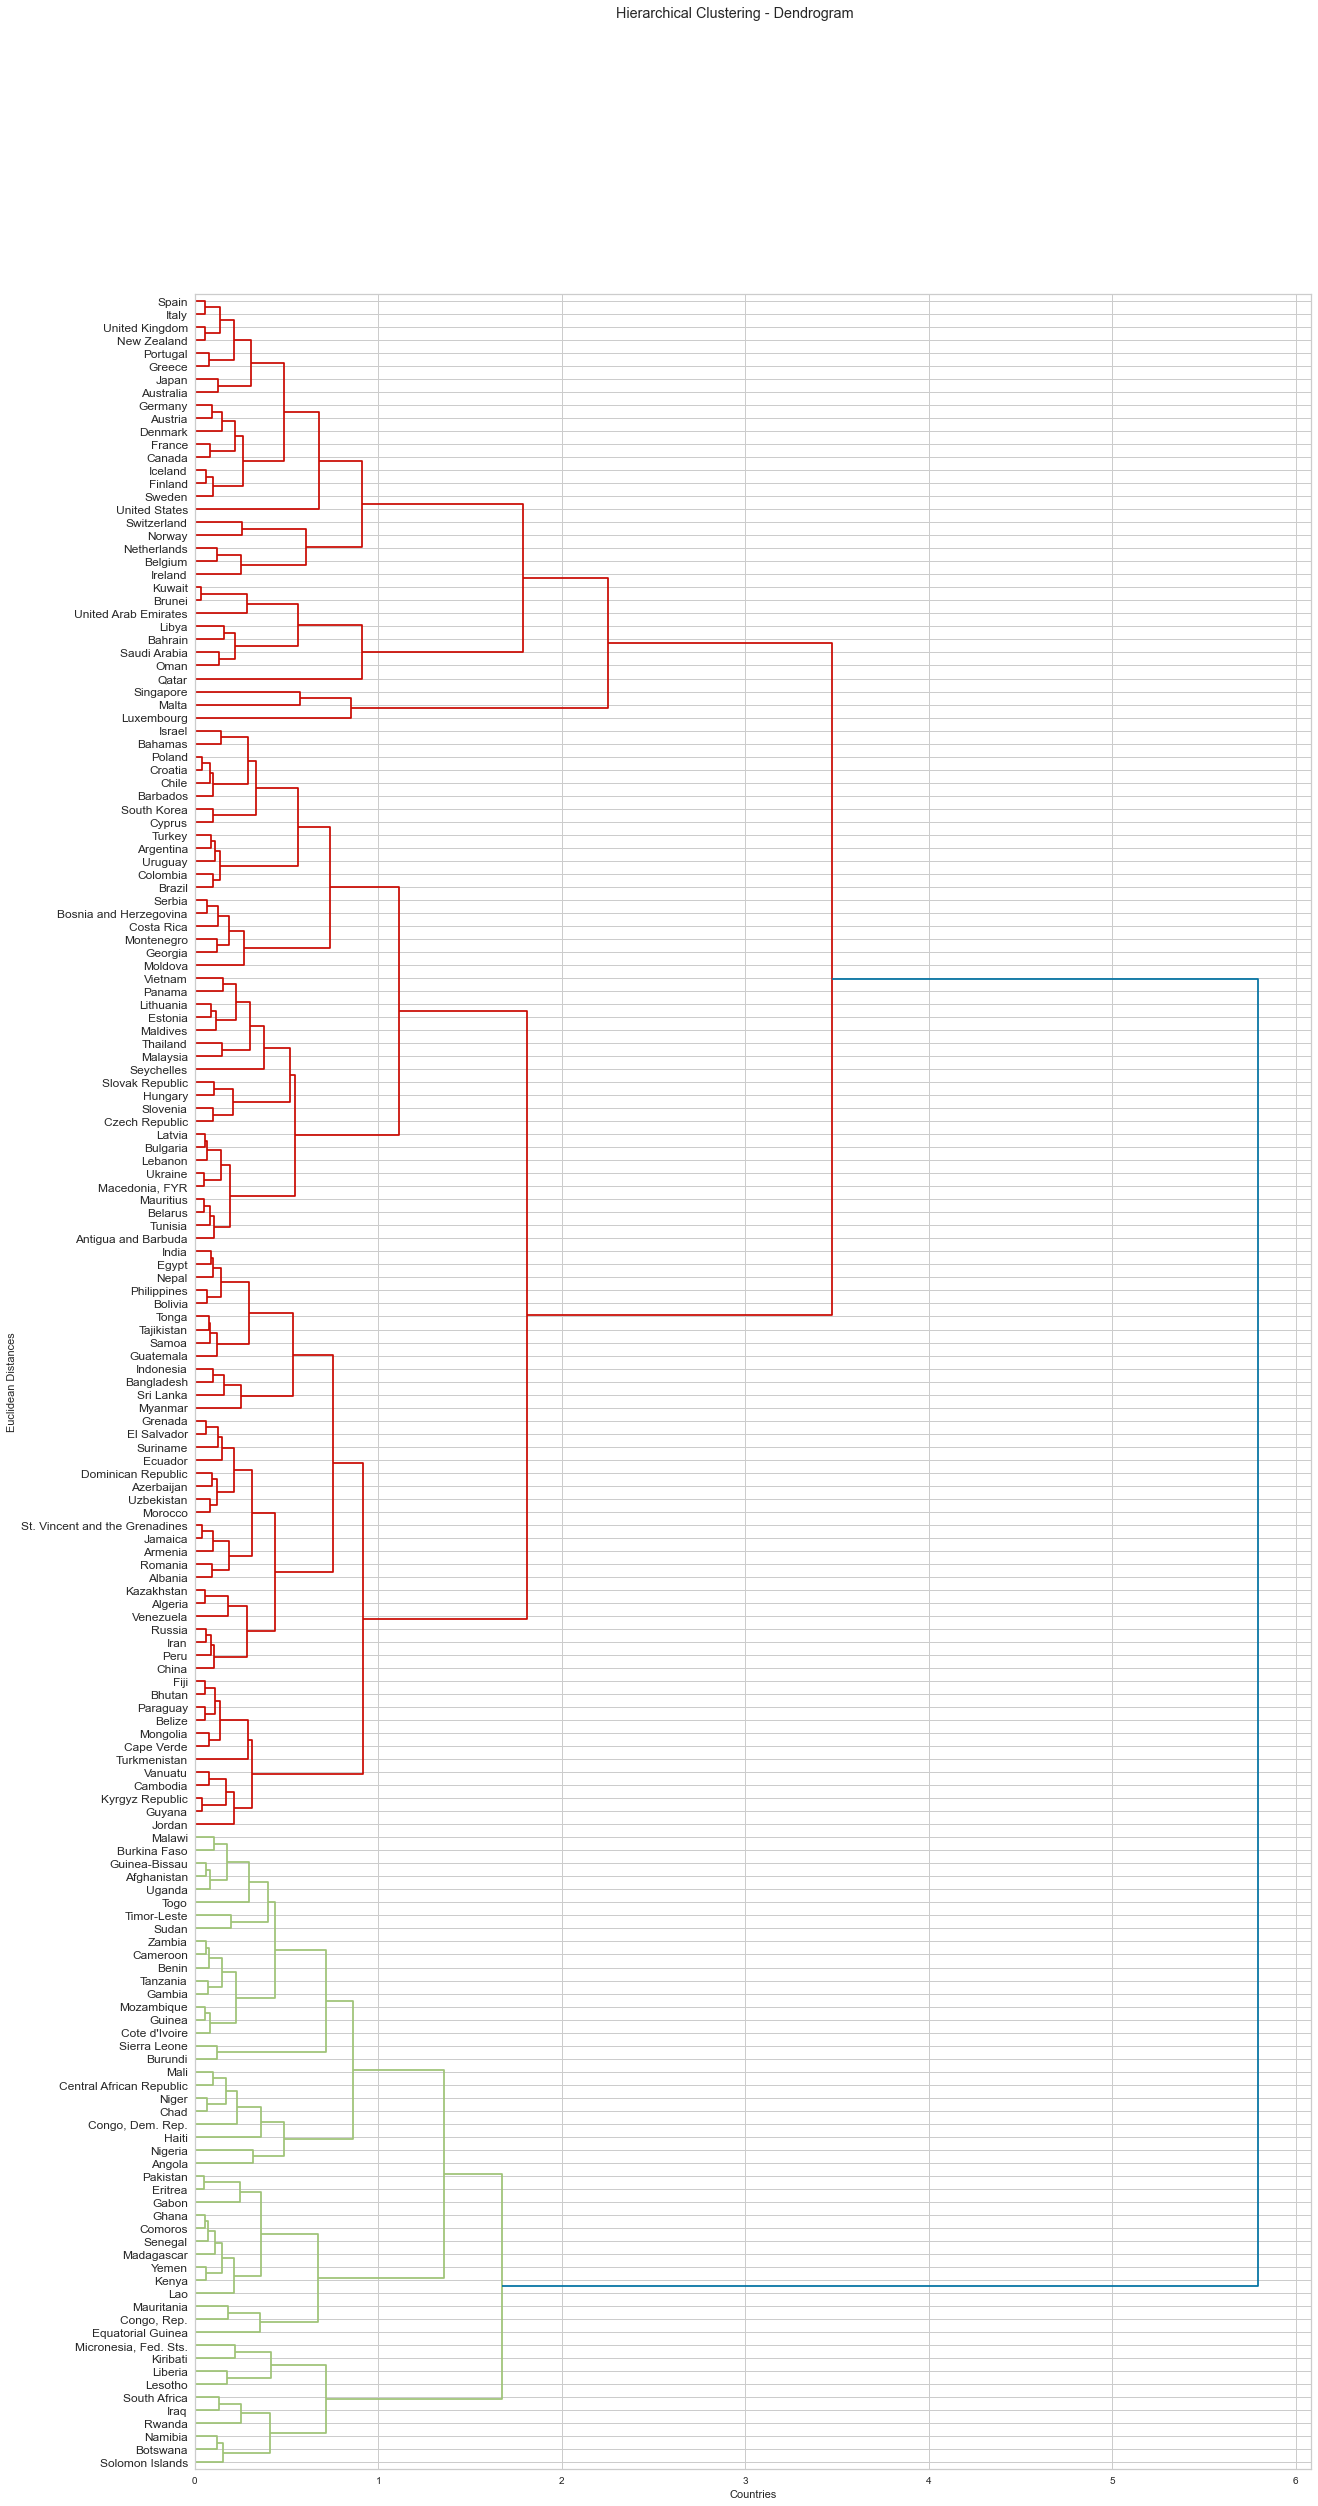

In [76]:
#linkage method: ward
plt.figure(figsize=(20,40))
dendrogram = sch.dendrogram(
                            sch.linkage(PCA_feats_norm1,
                                        method = 'ward'),
                            leaf_font_size=12,
                            orientation='right',
                            labels=PCA_feats_norm1.index
                            )
    #linkage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
plt.suptitle('Hierarchical Clustering - Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')

Text(0, 0.5, 'Euclidean Distances')

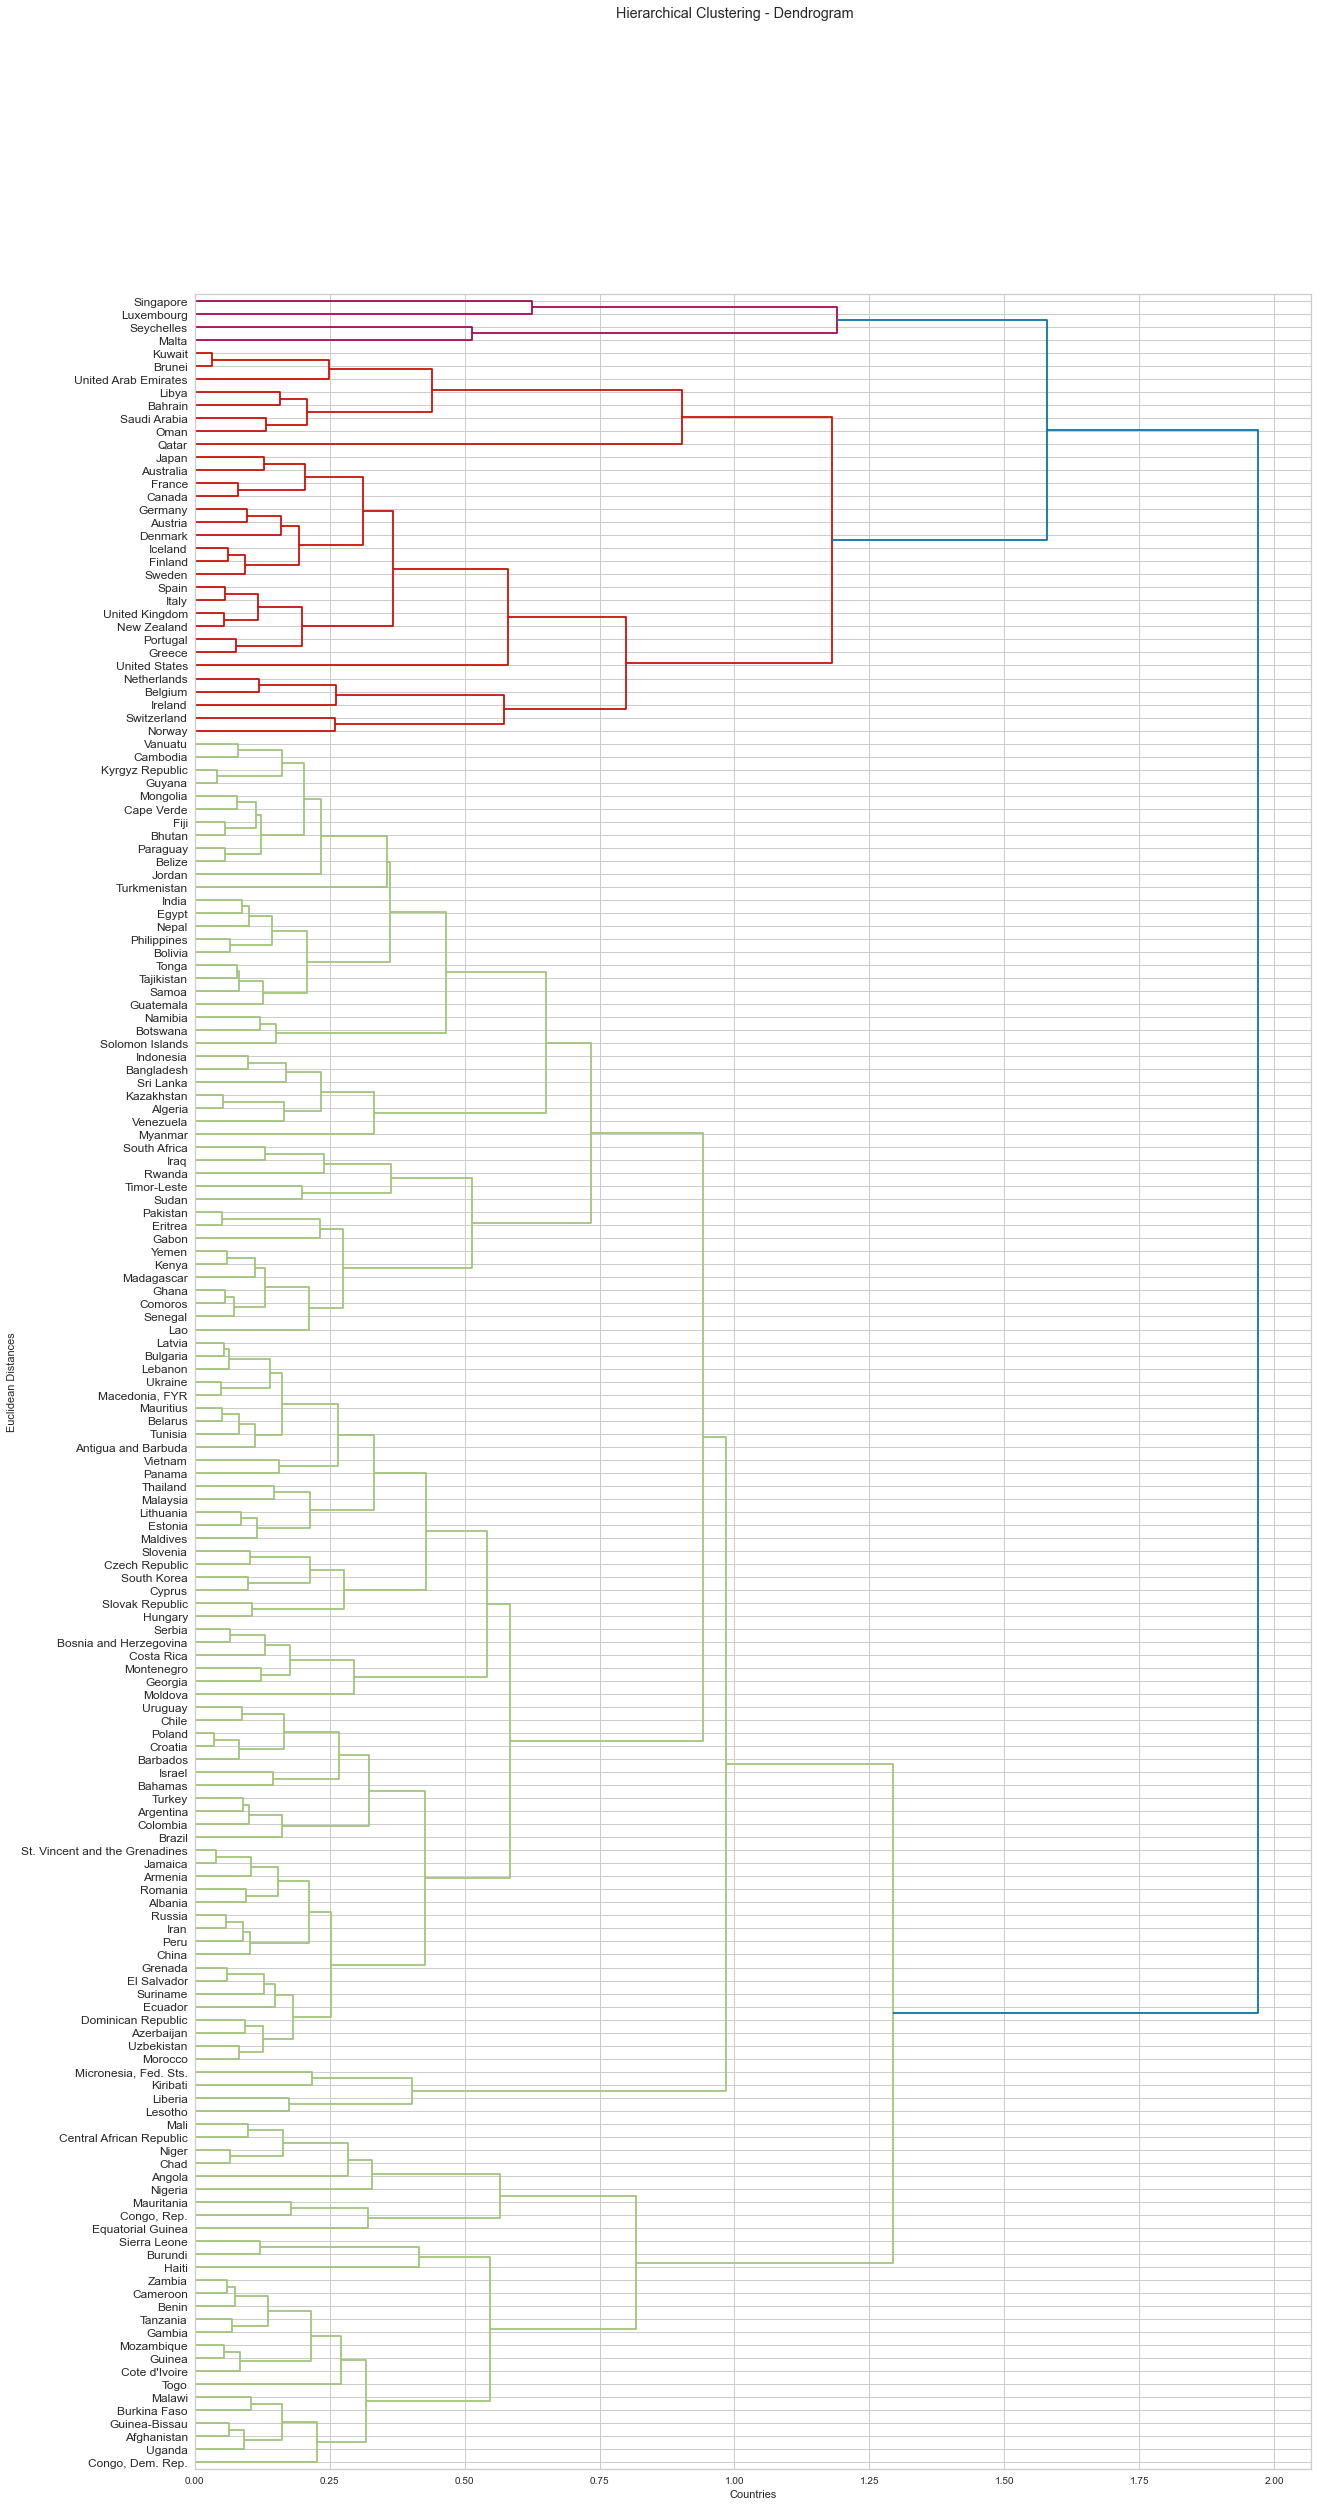

In [77]:
#linkage method: complete
plt.figure(figsize=(20,40))
dendrogram = sch.dendrogram(
                            sch.linkage(PCA_feats_norm1,
                                        method = 'complete'),
                            leaf_font_size=12,
                            orientation='right',
                            labels=PCA_feats_norm1.index
                            )
    #linkage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
plt.suptitle('Hierarchical Clustering - Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')

## DBSCAN

In [69]:
#MEGAN'S NOTE: disregarded because results don't make sense (1 big cluster)





#alternatively can use GridSearch

# for eps in [i/10 for i in range(1,7)]: #default eps = 0.5 (max distance between 2 samples for one to be considered as in the neighbourhood of the other)
#     for min_samples in range(2,6): #default 5
#         print(f'FOR eps {eps}')
#         print(f'FOR min samples {min_samples}')
        
#         dbscan = DBSCAN(eps = eps,
#                        min_samples = min_samples)
#         labels = dbscan.fit_predict(feats_norm)
#         score = silhouette_score(feats_norm, labels)
        
#         print(f'clusters present: {np.unique(labels)}')
#         print(f'clusters sizes: {np.bincount(labels + 1)}')
#         print(f'Silhouette score: {score}')
#         print("\n")

## Visualise clusters
### Final model
* for n_clusters = 3 (want to narrow down no. of countries in groups)
* for normalized + PCA + dimensionality reduction

In [123]:
kmeans = KMeans(n_clusters=3,
               random_state=0)
kmeans.fit(PCA_feats_norm)

y_preds_PCA_norm = kmeans.fit_predict(PCA_feats_norm)
y_preds_PCA_norm

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [124]:
#add the predictions (clusters) back to dataframe

data1 = data.copy()
data1['cluster'] = y_preds_PCA_norm
data1.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  
0       9.44        56.2       5.82    553        2  
1       4.49        76.3       1.65   4090        0  
2      16.10        76.5       2.89   4460        0  
3      22.40        60.1       6.16   3530        2  
4       1.44        76.8       2.13  12200        0

In [125]:
pd.set_option("display.max_rows",200)
data1.groupby(['cluster', 'country']).mean() #groups by clusters > countries

child_mort  exports  health   imports  \
cluster country                                                                 
0       Albania                               16.6   28.000    6.55   48.6000   
        Algeria                               27.3   38.400    4.17   31.4000   
        Antigua and Barbuda                   10.3   45.500    6.03   58.9000   
        Argentina                             14.5   18.900    8.10   16.0000   
        Armenia                               18.1   20.800    4.40   45.3000   
        Azerbaijan                            39.2   54.300    5.88   20.7000   
        Bahamas                               13.8   35.000    7.89   43.7000   
        Bahrain                                8.6   69.500    4.97   50.9000   
        Bangladesh                            49.4   16.000    3.52   21.8000   
        Barbados                              14.2   39.500    7.97   48.7000   
        Belarus                                5.5   51.400    5.61   64.5000   
        Belize                                18.8   58.200    5.20   57.5000   
        Bhutan                                42.7   42.500    5.20   70.7000   
        Bolivia                               46.6   41.200    4.84   34.3000   
        Bosnia and Herzegovina                 6.9   29.700   11.10   51.3000   
        Botswana                              52.5   43.600    8.30   51.3000   
        Brazil                                19.8   10.700    9.01   11.8000   
        Bulgaria                              10.8   50.200    6.87   53.0000   
        Cambodia                              44.4   54.100    5.68   59.5000   
        Cape Verde                            26.5   32.700    4.09   61.8000   
        Chile                                  8.7   37.700    7.96   31.3000   
        China                                 15.7   26.300    5.07   22.6000   
        Colombia                              18.6   15.900    7.59   17.8000   
        Costa Rica                            10.2   33.200   10.90   35.0000   
        Croatia                                5.5   37.600    7.76   38.1000   
        Dominican Republic                    34.4   22.700    6.22   33.3000   
        Ecuador                               25.1   27.900    8.06   32.4000   
        Egypt                                 29.1   21.300    4.66   26.6000   
        El Salvador                           19.2   26.900    6.91   46.6000   
        Estonia                                4.5   75.100    6.03   68.7000   
        Fiji                                  24.1   57.800    4.86   63.9000   
        Georgia                               16.5   35.000   10.10   52.8000   
        Grenada                               14.6   23.800    5.86   49.2000   
        Guatemala                             35.4   25.800    6.85   36.3000   
        Guyana                                37.6   51.400    5.38   79.1000   
        Hungary                                6.0   81.800    7.33   76.5000   
        India                                 58.8   22.600    4.05   27.1000   
        Indonesia                             33.3   24.300    2.61   22.4000   
        Iran                                  19.3   24.400    5.60   19.4000   
        Jamaica                               18.1   31.300    4.81   49.6000   
        Jordan                                21.1   48.300    8.04   69.0000   
        Kazakhstan                            21.5   44.200    4.29   29.9000   
        Kyrgyz Republic                       29.6   51.600    6.18   81.7000   
        Latvia                                 7.8   53.700    6.68   55.1000   
        Lebanon                               10.3   35.800    7.03   60.2000   
        Libya                                 16.6   65.600    3.88   42.1000   
        Lithuania                              6.1   65.300    7.04   67.2000   
        Macedonia, FYR                        10.4   39.800    7.09   5

In [126]:
px.choropleth(data_frame=data1,
             locationmode='country names',
             locations='country',
             color=data1['cluster'],
             title='Countries by clusters',
             projection='equirectangular')

#indigo (cluster 0):
    #South America, some parts of Africa, Europe, Asia

#pink (cluster 1):
    #North America, Europe, some parts of Asia

#yellow (cluster 2):
    #Africa and Asia
    
#blank: countries with no data

In [128]:
clusters_summary = pd.pivot_table(data1, index=['cluster']) #original dataset with countries + unscaled features
clusters_summary

child_mort    exports          gdpp    health    imports  \
cluster                                                             
0         22.425581  40.382430   6719.790698  6.215581  46.932162   
1          4.897143  58.431429  43117.142857  8.917429  51.508571   
2         93.284783  29.287174   1695.913043  6.338478  43.297826   

               income  inflation  life_expec  total_fer  
cluster                                                  
0        12770.813953   7.609023   72.582558   2.293256  
1        45802.857143   2.535000   80.245714   1.741143  
2         3516.804348  12.097065   59.393478   5.090217

In [129]:
cluster_0 = data1.loc[data1['cluster'] == 0]
cluster_0['country'].unique()

#"middle group" when comparing clusters
#features lie in middle of range

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania',
       'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'South Africa', 'Sri Lanka', 'St. Vincent

In [130]:
cluster_1 = data1.loc[data1['cluster'] == 1]
cluster_1['country'].unique()

#"positive group" when comparing clusters
#features lie on positive ends of range

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand',
       'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic',
       'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype=object)

In [131]:
cluster_2 = data1.loc[data1['cluster'] == 2]
cluster_2['country'].unique()

#"negative group" when comparing clusters
#features lie on negative ends of range (eg high child mortality, low gdpp, low imports, low life expectancy)

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)